In [1]:
!pip install -U scikit-learn pandas numpy catboost plotly nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not 

### Knn

In [ ]:
import pandas as pd

train_data = pd.read_csv('train.csv', header=None)

train_data.head()

In [ ]:
train_data.info()

In [ ]:
train_data.describe()

In [ ]:
y = pd.read_csv('train-target.csv', header=None)
y[:10]

In [ ]:
from sklearn.model_selection import train_test_split

import pandas as pd

train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('train-target.csv', header=None)


X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_clf.fit(X=X_train, y=y_train)

# Посмотрим  метрику  для knn
# Для ROC-AUC нам нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец

print(f"kNN при n_neighbors = 1")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, knn_clf.predict_proba(X_train)[:, 1])}")

/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


kNN при n_neighbors = 1
TEST:  ROC-AUC -- 0.7891676900273129
TRAIN: ROC-AUC -- 0.9051223174501029


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

list_roc_auc = []
list_n = []
for n in range(1, 18):
    knn_clf = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
    knn_clf.fit(X=X_train, y=y_train)

    # Посмотрим эту метрику  для knn
    # Для ROC-AUC нам нужны вероятности принадлежности положительному классу
    # Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец
    list_roc_auc.append(roc_auc_score(y_val, knn_clf.predict_proba(X_val)[:, 1]))
    list_n.append(n)





/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-pac

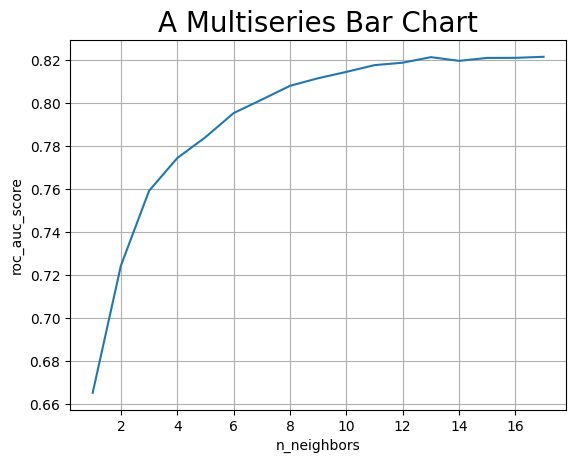

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_n, list_roc_auc)
# plt.title('A Multiseries Bar Chart', fontsize=20)
plt.xlabel('n_neighbors')
plt.ylabel('roc_auc_score')
plt.grid(visible=True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn_clf.fit(train_data, y=train_target)

/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [34]:
def save_array_to_submission(array, name='last_submission'):

    assert array.shape == (2000, 2), 'shape doesnt match'

    df_subm = pd.DataFrame(array, columns=[0,1])

    df_subm[1].to_csv(f'{name}.csv', index=False, header=False)
    return 'ok'

In [ ]:
test_data = pd.read_csv('test.csv', header=None)
predict = knn_clf.predict_proba(test_data)
print(predict)
save_array_to_submission(predict, name='knn_n_15')

[[0.8        0.2       ]
 [0.86666667 0.13333333]
 [0.66666667 0.33333333]
 ...
 [0.73333333 0.26666667]
 [0.66666667 0.33333333]
 [0.26666667 0.73333333]]


'ok'

## Логистическая регрессия

In [87]:
from sklearn.model_selection import train_test_split

import pandas as pd

train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('train-target.csv', header=None)[0]


# Разделим данные на обучене и тест (как и раньше со стратификацией по таргету)
X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.25, stratify = train_target, random_state=0)

In [88]:
df = train_data.copy()
df['label'] = train_target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225,1
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111,1
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332,0
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368,0
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596,1


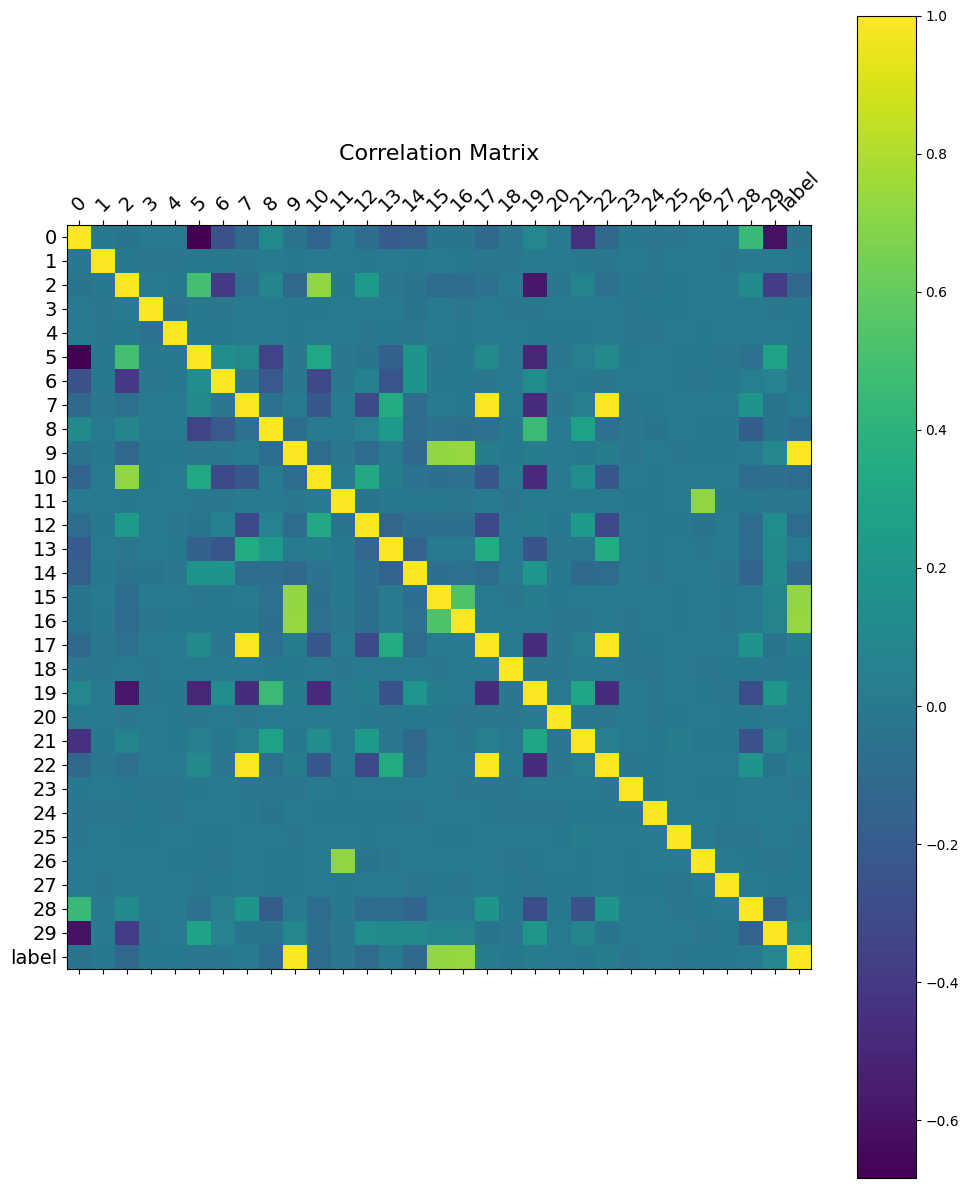

In [89]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(12,15))
plt.matshow(df.corr(),fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
# cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [90]:
train_data = train_data.drop([7, 9, 15, 16, 17, 22], axis=1)
train_data = train_data.drop([2,8,10,12,14], axis=1)

In [66]:
# Импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression


In [67]:
# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()



In [68]:
# Обучим его на обучающем датасете
model_LR.fit(X=X_train, y=y_train)

/home/amd/projects/ALLCUPS_B_Binary_classification/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
from sklearn.metrics import roc_auc_score
print(model_LR.predict_proba(X_val))
# Посмотрим  метрику  ROC-AUC
print(f"model_LR")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, model_LR.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1])}")

[[9.99627547e-01 3.72453480e-04]
 [1.35923003e-04 9.99864077e-01]
 [4.37186023e-06 9.99995628e-01]
 ...
 [9.99681839e-01 3.18161100e-04]
 [1.07196049e-04 9.99892804e-01]
 [1.21680392e-02 9.87831961e-01]]
model_LR
TEST:  ROC-AUC -- 0.99999935993077
TRAIN: ROC-AUC -- 1.0


In [70]:
test_data = pd.read_csv('test.csv', header=None)
predict = model_LR.predict_proba(test_data)
print(predict)
save_array_to_submission(predict, name='LR')

[[0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.23588853e-78]
 [1.00000000e+00 1.08646728e-41]]


NameError: name 'save_array_to_submission' is not defined

In [84]:
# Импортируем класс StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

In [93]:
# Отмасштабируем наши признаки
# Создадим объект класса StandardScaler



scaler = StandardScaler()

# Сделаем .fit() на обучении
scaler.fit(X_train, y_train) # считает среднее по выборке и std

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_val  = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

In [91]:
# Импортируем класс Normalizer из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import Normalizer
# Отмасштабируем наши признаки
# Создадим объект класса Normalizer



scaler = Normalizer()

# Сделаем .fit() на обучении
scaler.fit(X_train, y_train) # считает среднее по выборке и std

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_val  = pd.DataFrame(scaler.transform(X_val), index=X_val.index, columns=X_val.columns)

In [92]:
# Построим логистическую регрессию на новых данных

# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_val)
y_pred_train_LR = model_LR.predict(X_train)

from sklearn.metrics import roc_auc_score
print(model_LR.predict_proba(X_val))
# Посмотрим  метрику  ROC-AUC
print(f"model_LR")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_val, model_LR.predict_proba(X_val)[:, 1])}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, model_LR.predict_proba(X_train)[:, 1])}")

[[0.39700157 0.60299843]
 [0.29754714 0.70245286]
 [0.41233134 0.58766866]
 ...
 [0.41253135 0.58746865]
 [0.48360536 0.51639464]
 [0.50416624 0.49583376]]
model_LR
TEST:  ROC-AUC -- 0.6551953459286155
TRAIN: ROC-AUC -- 0.6582344882205149
